# Evolution des prix de la nuitée à Paris sur Airbnb 🏡

---

<img src="https://fintech-mag.com/wp-content/uploads/2018/03/paul-dufour-175889-unsplash.jpg" />


Le but de ce projet est de comprendre comment évolue les prix d'une nuit d'Airbnb dans un appartement Parisien.

Pour cela, nous avons accès à plusieurs caractéristiques du bien:
- Son prix
- Le nombre de pièce
- Le quartier
- Les avis du propriétaire
- La localisation exacte
- etc...

Le dataset a été téléchargé depuis [InsideAirbnb](http://insideairbnb.com/get-the-data.html). C'est un site très complet qui résume les annonces Airbnb sur plusieurs villes françaises.

## 1) Commençons par importer nos données dans un dataframe

In [1]:
# TODO - Download and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = (96)
df = pd.read_csv('Données/listings.csv')
df

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                            listing_url       scrape_id  \
0          2577      https://www.airbnb.com/rooms/2577  20181207151406   
1          3109      https://www.airbnb.com/rooms/3109  20181207151406   
2          5396      https://www.airbnb.com/rooms/5396  20181207151406   
3          7397      https://www.airbnb.com/rooms/7397  20181207151406   
4          7964      https://www.airbnb.com/rooms/7964  20181207151406   
5          8522      https://www.airbnb.com/rooms/8522  20181207151406   
6          9359      https://www.airbnb.com/rooms/9359  20181207151406   
7          9952      https://www.airbnb.com/rooms/9952  20181207151406   
8         10010     https://www.airbnb.com/rooms/10010  20181207151406   
9         10270     https://www.airbnb.com/rooms/10270  20181207151406   
10        10586     https://www.airbnb.com/rooms/10586  20181207151406   
11        10588     https://www.airbnb.com/rooms/10588  20181207151406   
12        10710     https://www.airbnb.com/rooms/10710  20181207151406   
13        11170     https://www.airbnb.com/rooms/11170  20181207151406   
14        11213     https://www.airbnb.com/rooms/11213  20181207151406   
15        11265     https://www.airbnb.com/rooms/11265  20181207151406   
16        11487     https://www.airbnb.com/rooms/11487  20181207151406   
17        11798     https://www.airbnb.com/rooms/11798  20181207151406   
18        11848     https://www.airbnb.com/rooms/11848  20181207151406   
19        12268     https://www.airbnb.com/rooms/12268  20181207151406   
20        12452     https://www.airbnb.com/rooms/12452  20181207151406   
21        14011     https://www.airbnb.com/rooms/14011  20181207151406   
22        14264     https://www.airbnb.com/rooms/14264  20181207151406   
23        14757     https://www.airbnb.com/rooms/14757  20181207151406   
24        16455     https://www.airbnb.com/rooms/16455  20181207151406   
25        16457     https://www.airbnb.com/rooms/16457  20181207151406   
26        16469     https://www.airbnb.com/rooms/16469  20181207151406   
27        16626     https://www.airbnb.com/rooms/16626  20181207151406   
28        17283     https://www.airbnb.com/rooms/17283  20181207151406   
29        17287     https://www.airbnb.com/rooms/17287  20181207151406   
...         ...                                    ...             ...   
59851  30588259  https://www.airbnb.com/rooms/30588259  20181207151406   
59852  30588590  https://www.airbnb.com/rooms/30588590  20181207151406   
59853  30589090  https://www.airbnb.com/rooms/30589090  20181207151406   
59854  30589615  https://www.airbnb.com/rooms/30589615  20181207151406   
59855  30589813  https://www.airbnb.com/rooms/30589813  20181207151406   
59856  30590162  https://www.airbnb.com/rooms/30590162  20181207151406   
59857  30590721  https://www.airbnb.com/rooms/30590721  20181207151406   
59858  30591231  https://www.airbnb.com/rooms/30591231  20181207151406   
59859  30591953  https://www.airbnb.com/rooms/30591953  20181207151406   
59860  30594240  https://www.airbnb.com/rooms/30594240  20181207151406   
59861  30597137  https://www.airbnb.com/rooms/30597137  20181207151406   
59862  30597336  https://www.airbnb.com/rooms/30597336  20181207151406   
59863  30597650  https://www.airbnb.com/rooms/30597650  20181207151406   
59864  30602452  https://www.airbnb.com/rooms/30602452  20181207151406   
59865  30604188  https://www.airbnb.com/rooms/30604188  20181207151406   
59866  30605791  https://www.airbnb.com/rooms/30605791  20181207151406   
59867  30606740  https://www.airbnb.com/rooms/30606740  20181207151406   
59868  30608375  https://www.airbnb.com/rooms/30608375  20181207151406   
59869  30609227  https://www.airbnb.com/rooms/30609227  20181207151406   
59870  30611455  https://www.airbnb.com/rooms/30611455  20181207151406   
59871  30612200  https://www.airbnb.com/rooms/30612200  20181207151406   
59872  30615133  https://www.airbnb.com/rooms/30615133  20181207151406   
59873  30617682  

### 1) Analyse globale de nos données 

In [3]:
# Combien de données avons-nous à disposition?
print("Nombre de données: "+str(df.shape[0]))
print("Nombre de features: "+str(df.shape[1]))

Nombre de données: 59881
Nombre de features: 96


In [4]:
# Quelles sont les colonnes à notre disposition?
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
df.isnull().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   74
summary                              2357
space                               19365
description                           497
experiences_offered                     0
neighborhood_overview               24234
notes                               41275
transit                             21721
access                              31034
interaction                         31523
house_rules                         31406
thumbnail_url                       59881
medium_url                          59881
picture_url                             0
xl_picture_url                      59881
host_id                                 0
host_url                                0
host_name                               8
host_since                              8
host_location                     

Commençons par supprimer toutes les colonnes avec trop de valeurs manquantes

In [6]:
columns_to_drop = [i for i in df.isnull().sum().keys() if df.isnull().sum()[i]>10000]

In [9]:
df_new = df.drop(columns=columns_to_drop)
df_new.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last

Y a-t-il des lignes doubles?

In [118]:
df.duplicated().sum()

0

Nous nous allons pas dans un premier temps utiliser des méthodes complexes de NLP. Supprimons donc les colonnes avec des descriptions

In [10]:
df.head(1)

id                        listing_url       scrape_id last_scraped  \
0  2577  https://www.airbnb.com/rooms/2577  20181207151406   2018-12-08   

                               name  \
0  Loft for 4 by Canal Saint Martin   

                                             summary  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...   

                                               space  \
0  The district has any service or shop you may d...   

                                         description experiences_offered  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...                none   

  neighborhood_overview notes                        transit access  \
0                   NaN   NaN  Metro lines : 4, 8, 3, 11, 9.    NaN   

  interaction house_rules  thumbnail_url  medium_url  \
0         NaN         NaN            NaN         NaN   

                                         picture_url  xl_picture_url  host_id  \
0  https://a0.muscache.com/im/pictures/09da057c-0...             NaN     2827   

                                 host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/2827    Karine  2008-09-09   

                           host_location  \
0  Casablanca, Grand Casablanca, Morocco   

                                          host_about host_response_time  \
0  Arrivée à Casablanca il y a 4 ans, je suis amo...       within a day   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0                75%                   NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/17fe6c88-a...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/17fe6c88-a...         République   

   host_listings_count  host_total_listings_count  \
0                  2.0                        2.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                        street neighbourhood  \
0                      t  Paris, Île-de-France, France    République   

  neighbourhood_cleansed  neighbourhood_group_cleansed   city          state  \
0               Entrepôt                           NaN  Paris  Île-de-France   

  zipcode market smart_location country_code country   latitude  longitude  \
0   75010  Paris  Paris, France           FR  France  48.869933   2.362511   

  is_location_exact property_type        room_type  accommodates  bathrooms  \
0                 t          Loft  Entire home/apt             4        2.0   

   bedrooms  beds  bed_type  \
0       2.0   2.0  Real Bed   

                                           amenities  square_feet    price  \
0  {TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...          NaN  $125.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN           NaN            $0.00       $40.00                1   

  extra_people  minimum_nights  maximum_nights calendar_updated  \
0        $0.00               3            1125      4 weeks ago   

  has_availability  availability_30  availability_60  availability_90  \
0                t               12               13               13   

   availability_365 calendar_last_scraped  number_of_reviews first_review  \
0                39            2018-12-08                  0          NaN   

  last_review  review_scores_rating  review_scores_accuracy  \
0         NaN                   NaN                     NaN   

   review_scores_cleanliness  review_scores_checkin  \
0                        NaN                    NaN   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          NaN                     NaN                  NaN   

  requires_license license jurisdiction_names instant_bookable  \
0                t     NaN            {PARIS} 

In [12]:
columns_with_description = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 
                            'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_name',
                            'host_since', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
                           'host_verifications', 'host_has_profile_pic', 'smart_location',
                           'amenities', 'extra_people', 'calendar_updated', 'has_availability',
                           'availability_30', 'availability_60', 'availability_90', 'availability_365',
                           'calendar_last_scraped', 'requires_license', 'jurisdiction_names', 
                            'is_business_travel_ready', 'require_guest_profile_picture', 
                            'require_guest_phone_verification', 'calculated_host_listings_count', 'bathrooms']

df_new = df_new.drop(columns=columns_with_description)

In [13]:
df_new.isnull().sum()

summary                      2357
host_location                 191
host_is_superhost               8
host_neighbourhood           8602
host_total_listings_count       8
host_identity_verified          8
street                          0
neighbourhood                2650
neighbourhood_cleansed          0
city                           21
state                         730
zipcode                       797
market                        132
country_code                    0
country                         0
latitude                        0
longitude                       0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                       68
beds                          228
bed_type                        0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
instant_bookab

In [14]:
df_new = df_new.drop(columns=['summary', 'host_neighbourhood'])

In [15]:
df_new.isnull().sum()

host_location                 191
host_is_superhost               8
host_total_listings_count       8
host_identity_verified          8
street                          0
neighbourhood                2650
neighbourhood_cleansed          0
city                           21
state                         730
zipcode                       797
market                        132
country_code                    0
country                         0
latitude                        0
longitude                       0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                       68
beds                          228
bed_type                        0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
instant_bookable                0
cancellation_policy             0
dtype: int64

Etant donné la faible quantité des valeurs manquantes sur la plupart de nos features, nous allons directement supprimer ces lignes plutôt qu'essayer de les remplir

In [18]:
df_new = df_new.dropna(subset=['host_location', 'city', 'state', 'zipcode', 'bedrooms',
                              'beds', 'market'])
df_new.isnull().sum()

host_location                   0
host_is_superhost               0
host_total_listings_count       0
host_identity_verified          0
street                          0
neighbourhood                2565
neighbourhood_cleansed          0
city                            0
state                           0
zipcode                         0
market                          0
country_code                    0
country                         0
latitude                        0
longitude                       0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
beds                            0
bed_type                        0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
instant_bookable                0
cancellation_policy             0
dtype: int64

In [19]:
print('Neighbourhood "Na" proportion= '+ 
      str(round(df_new.isnull().sum()['neighbourhood']/df_new.shape[0]*100, 1))+'%')

Neighbourhood "Na" proportion= 4.4%


Nous remarquons que la colonne "Neigbourhood" donne la même information que celle "neighbourhood_cleansed" 

In [21]:
df_new = df_new.drop(columns=['neighbourhood'])

In [20]:
print(df_new.neighbourhood_cleansed.value_counts())
print('-------------------------------------------')
print('Nombre de catégorie = '+str(len(df_new.neighbourhood_cleansed.value_counts())))

Buttes-Montmartre      6744
Popincourt             5827
Vaugirard              4255
Entrepôt               4095
Batignolles-Monceau    3899
Ménilmontant           3497
Buttes-Chaumont        3311
Passy                  2857
Temple                 2759
Opéra                  2599
Reuilly                2356
Observatoire           2258
Gobelins               2078
Panthéon               1940
Hôtel-de-Ville         1804
Bourse                 1787
Luxembourg             1676
Palais-Bourbon         1588
Élysée                 1438
Louvre                 1117
Name: neighbourhood_cleansed, dtype: int64
-------------------------------------------
Nombre de catégorie = 20


Nous pouvons donc si nous le souhaitons ajouter une feature à notre jeu de donnée: L'arrondissement parisien

In [22]:
Numéro_arrondissement = {
    'Buttes-Montmartre': 18,
    'Popincourt': 11,
    'Entrepôt': 10,
    'Vaugirard': 15,
    'Batignolles-Monceau': 17,
    'Ménilmontant': 20,
    'Buttes-Chaumont': 19,
    'Reuilly': 12,
    'Opéra': 9,
    'Passy': 16,
    'Observatoire': 14,
    'Temple': 3,
    'Gobelins': 13,
    'Panthéon': 5,
    'Bourse': 2,
    'Hôtel-de-Ville': 4,
    'Luxembourg': 6,
    'Palais-Bourbon': 7,
    'Élysée': 1,
    'Louvre': 8,
}

In [23]:
df_new['zipcode'] = df_new['neighbourhood_cleansed'].apply(lambda x: Numéro_arrondissement[x])
df_new.zipcode.value_counts()

18    6744
11    5827
15    4255
10    4095
17    3899
20    3497
19    3311
16    2857
3     2759
9     2599
12    2356
14    2258
13    2078
5     1940
4     1804
2     1787
6     1676
7     1588
1     1438
8     1117
Name: zipcode, dtype: int64

In [24]:
df_new.isnull().sum()

host_location                0
host_is_superhost            0
host_total_listings_count    0
host_identity_verified       0
street                       0
neighbourhood_cleansed       0
city                         0
state                        0
zipcode                      0
market                       0
country_code                 0
country                      0
latitude                     0
longitude                    0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bedrooms                     0
beds                         0
bed_type                     0
price                        0
guests_included              0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
instant_bookable             0
cancellation_policy          0
dtype: int64

In [25]:
df_new.describe()

host_total_listings_count       zipcode      latitude     longitude  \
count               57885.000000  57885.000000  57885.000000  57885.000000   
mean                    6.008033     12.191587     48.864189      2.345880   
std                    38.001612      5.528988      0.018486      0.033463   
min                     0.000000      1.000000     48.813083      2.220731   
25%                     1.000000      9.000000     48.850820      2.324624   
50%                     1.000000     12.000000     48.865263      2.348668   
75%                     1.000000     17.000000     48.879482      2.371280   
max                  1305.000000     20.000000     48.905774      2.473815   

       accommodates      bedrooms          beds  guests_included  \
count  57885.000000  57885.000000  57885.000000     57885.000000   
mean       3.042308      1.086102      1.669724         1.431286   
std        1.530140      0.978651      1.131556         0.952866   
min        1.000000      0.000000      0.000000         1.000000   
25%        2.000000      1.000000      1.000000         1.000000   
50%        2.000000      1.000000      1.000000         1.000000   
75%        4.000000      1.000000      2.000000         2.000000   
max       17.000000     50.000000     50.000000        16.000000   

       minimum_nights  maximum_nights  number_of_reviews  
count    57885.000000    5.788500e+04       57885.000000  
mean         5.460275    8.801603e+02          18.693668  
std         50.865857    4.174331e+04          37.001263  
min          1.000000    1.000000e+00           0.000000  
25%          2.000000    3.000000e+01           1.000000  
50%          3.000000    1.125000e+03           6.000000  
75%          4.000000    1.125000e+03          19.000000  
max       9999.000000    1.000000e+07         744.000000

## 2) Analyse statistique de nos données 

### 2.1 Analyse des données à disposition: 

- Nos appartements sont-ils tous à Paris?
- Nos informations sont-elles pertinentes?
- Sont-elles exploitables?

In [26]:
df_new['is_location_exact'].value_counts()

t    50189
f     7696
Name: is_location_exact, dtype: int64

Gardons seulement dans un premier temps nos appartement à Paris pour laquelle nous sommes sûr de leur localisation (is_location_exact = True)

Nous perdons ainsi environ **10%** de nos données

In [27]:
df_new = df_new[df_new['market']=='Paris']
df_new = df_new[df_new['is_location_exact']=='t']
df_new['market'].value_counts()

Paris    50154
Name: market, dtype: int64

Analysons dorénavant nos autres données. Par exemple, il semblerait que la colonne **'prix'** soit dans un format inexploitable

In [28]:
df_new.price[0]

'$125.00'

In [29]:
df_new['price'] = df_new['price'].apply(lambda x: x.replace('$','').replace(',',''))
df_new.price[0]

'125.00'

Le résultat n'est toujours pas satisfaisant étant donné que cela se présente sous la forme d'un string

In [30]:
df_new['price'] = df_new['price'].astype(float)
df_new.price[0]

125.0

In [31]:
df_new['instant_bookable'].value_counts()

f    33927
t    16227
Name: instant_bookable, dtype: int64

In [32]:
df_new['host_is_superhost'].value_counts()

f    44787
t     5367
Name: host_is_superhost, dtype: int64

### 2.2 Mise en évidence d'outliers 

Intéressons-nous aux prix des biens sur Paris

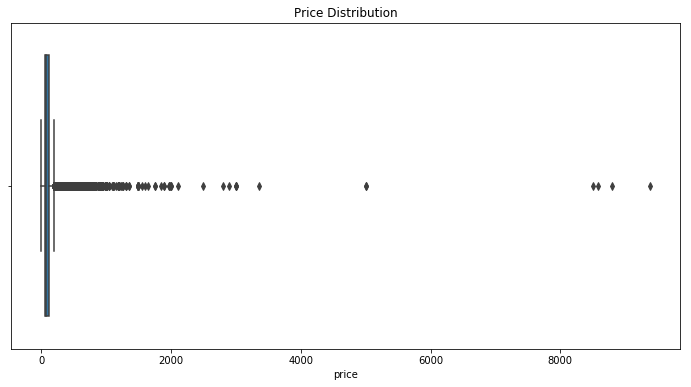

In [33]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.price)
plt.title('Price Distribution')
plt.show()

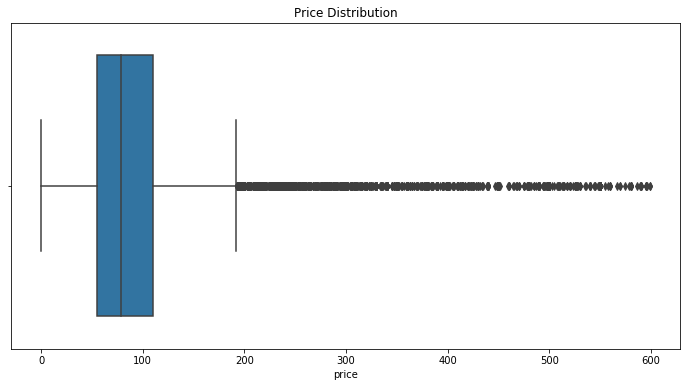

In [38]:
df_new = df_new[df_new["price"]<600]
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.price)
plt.title('Price Distribution')
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


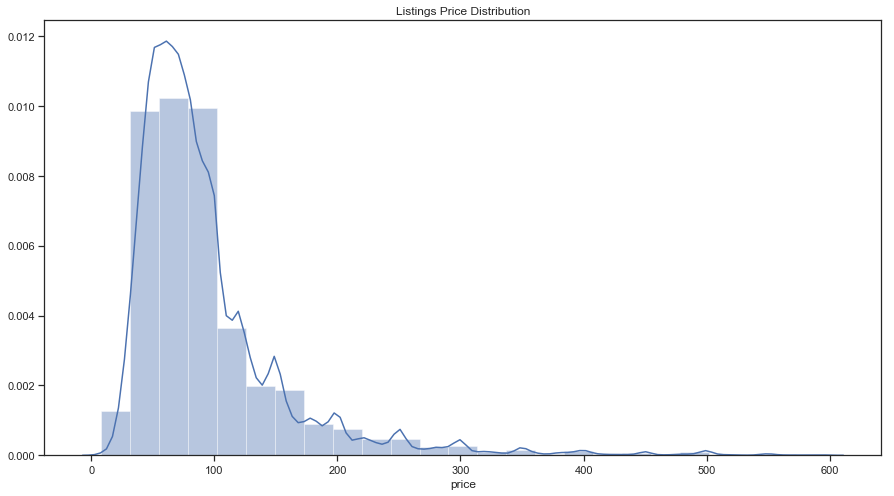

In [313]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new["price"], bins=25)
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


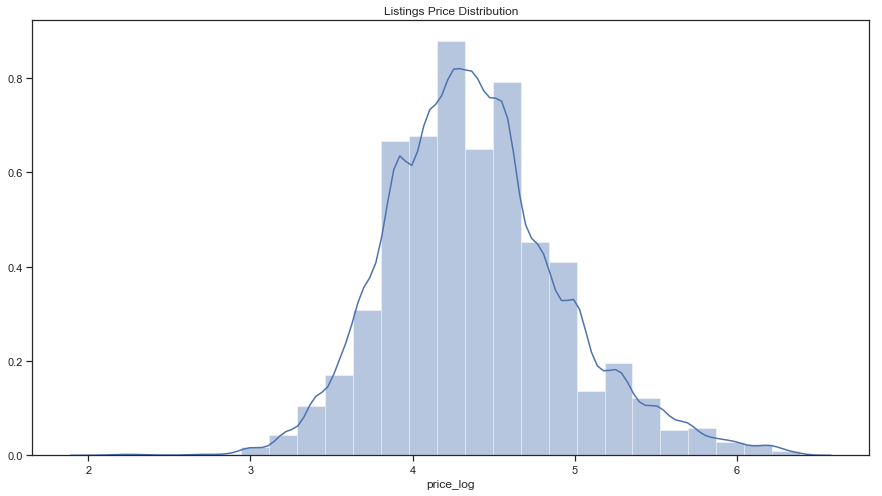

In [314]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new["price_log"], bins=25)
plt.show()

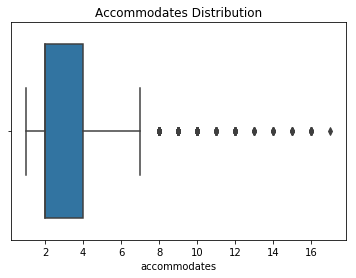

In [40]:
sns.boxplot(x=df_new.accommodates)
plt.title('Accommodates Distribution')
plt.show()

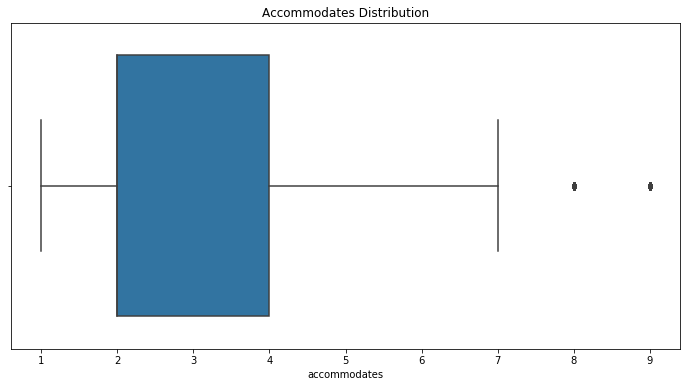

In [41]:
df_new = df_new[df_new["accommodates"]<10]
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.accommodates)
plt.title('Accommodates Distribution')
plt.show()

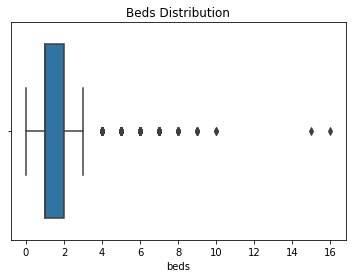

In [42]:
sns.boxplot(x=df_new.beds)
plt.title('Beds Distribution')
plt.show()

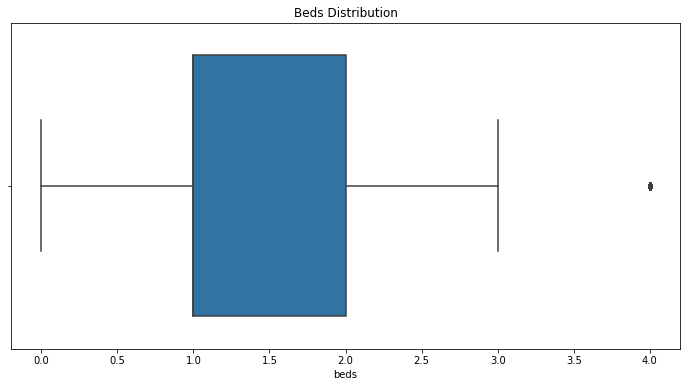

In [43]:
df_new = df_new[df_new["beds"]<5]
df_new = df_new[df_new["bedrooms"]<4]
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.beds)
plt.title('Beds Distribution')
plt.show()

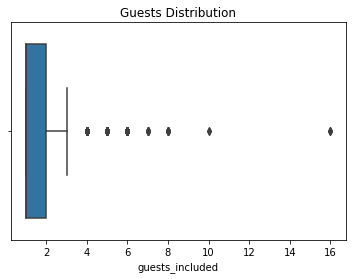

In [44]:
sns.boxplot(x=df_new.guests_included)
plt.title('Guests Distribution')
plt.show()

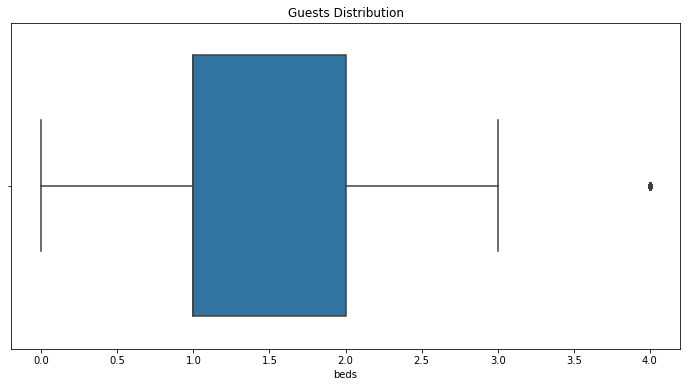

In [45]:
df_new = df_new[df_new["guests_included"]<8]
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.beds)
plt.title('Guests Distribution')
plt.show()

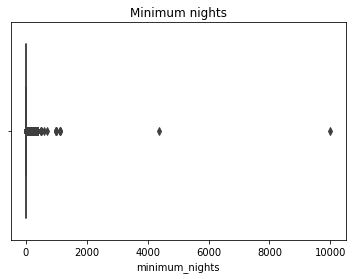

In [46]:
sns.boxplot(x=df_new.minimum_nights)
plt.title('Minimum nights')
plt.show()

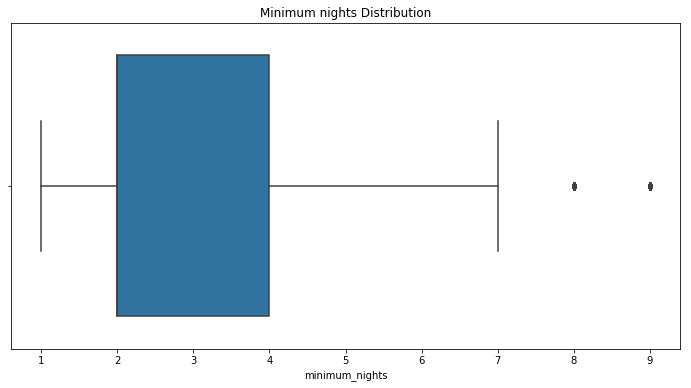

In [47]:
df_new = df_new[df_new["minimum_nights"]<10]
plt.figure(figsize=(12, 6))

sns.boxplot(x=df_new.minimum_nights)
plt.title('Minimum nights Distribution')
plt.show()

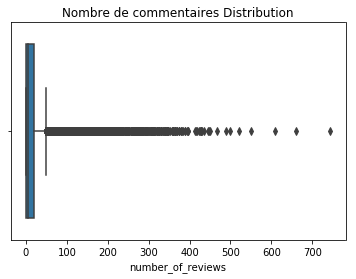

In [49]:
sns.boxplot(x=df_new.number_of_reviews)
plt.title('Nombre de commentaires Distribution')
plt.show()

In [50]:
df_new.describe()

host_total_listings_count       zipcode      latitude     longitude  \
count               46102.000000  46102.000000  46102.000000  46102.000000   
mean                    4.907878     12.307969     48.864416      2.346641   
std                    37.035834      5.498269      0.018613      0.033103   
min                     0.000000      1.000000     48.813266      2.220731   
25%                     1.000000      9.000000     48.850892      2.325843   
50%                     1.000000     13.000000     48.865594      2.349036   
75%                     1.000000     17.000000     48.879919      2.371898   
max                  1305.000000     20.000000     48.904834      2.467046   

       accommodates      bedrooms          beds         price  \
count  46102.000000  46102.000000  46102.000000  46102.000000   
mean       2.933994      1.017505      1.566678     93.869962   
std        1.292885      0.716529      0.809808     64.084297   
min        1.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      1.000000     55.000000   
50%        2.000000      1.000000      1.000000     78.000000   
75%        4.000000      1.000000      2.000000    110.000000   
max        9.000000      3.000000      4.000000    596.000000   

       guests_included  minimum_nights  maximum_nights  number_of_reviews  
count     46102.000000    46102.000000    4.610200e+04       46102.000000  
mean          1.389267        2.803891    8.900722e+02          19.484881  
std           0.818330        1.638099    4.657589e+04          38.045149  
min           1.000000        1.000000    1.000000e+00           0.000000  
25%           1.000000        2.000000    3.000000e+01           1.000000  
50%           1.000000        2.000000    1.125000e+03           6.000000  
75%           2.000000        4.000000    1.125000e+03          20.000000  
max           7.000000        9.000000    1.000000e+07         744.000000

## 3) Vizualisation 

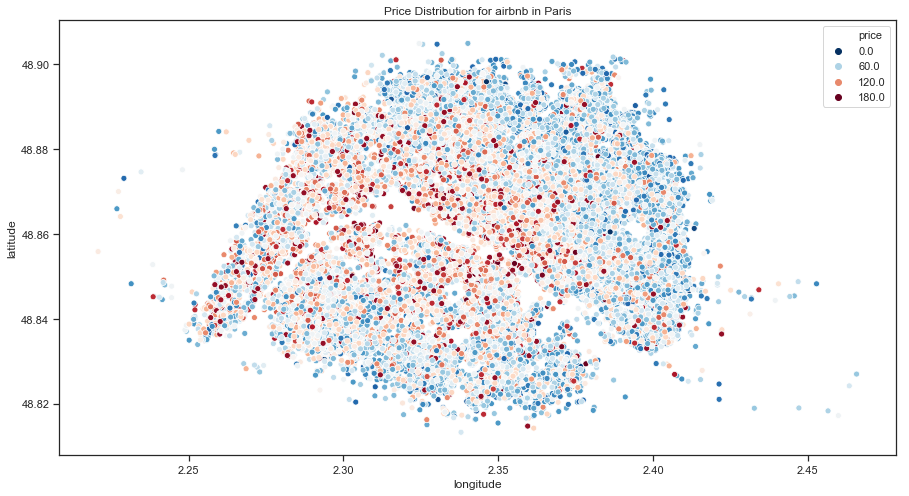

In [217]:
plt.figure(figsize=(15, 8))
plt.title("Price Distribution for airbnb in Paris")
sns.scatterplot(x="longitude", y="latitude", hue="price", palette="RdBu_r", data= df_new[df_new['price']<160])
plt.show()

Comme nous pouvions l'imaginer, les appartements les plus chers de Paris se situent dans le centre. Plus nous allons, en périphérie et plus la nuitée baisse.

Néanmoins, voyons si seulement est vraiment le cas en filtrant les prix médians quartier par quartier.

In [58]:
median_price_per_neighbourhood = df_new.groupby("zipcode")["price"].median()
median_price_per_neighbourhood.sort_values(ascending=False)

zipcode
1     115.0
8     113.0
6     110.0
4     109.0
3     100.0
7     100.0
2      98.0
16     95.0
5      90.0
9      85.0
15     80.0
10     75.0
17     71.0
11     70.0
14     70.0
12     69.0
18     69.0
13     65.0
19     60.0
20     60.0
Name: price, dtype: float64

Créons donc une nouvelle variable qui répertorie le prix médian dans un arrondissement parisien

In [60]:
df_new["zipcode_price"] = df_new["zipcode"].apply(lambda x: median_price_per_neighbourhood[x])

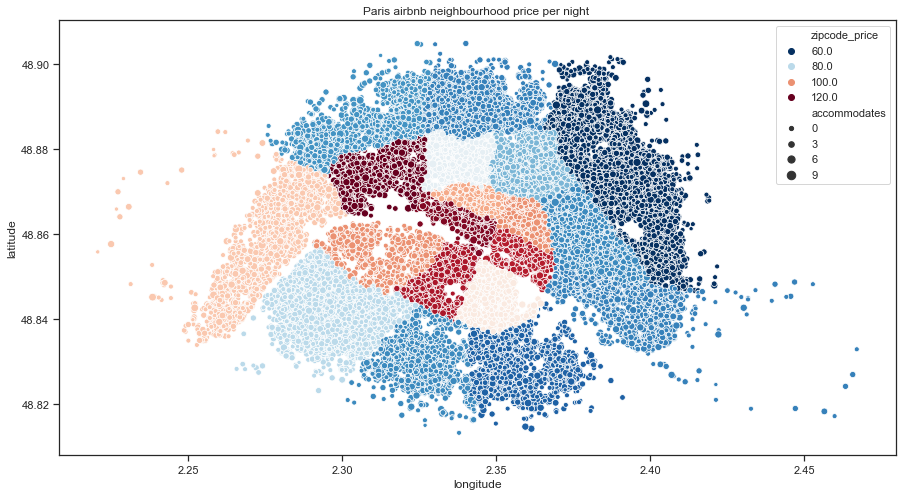

In [216]:
plt.figure(figsize=(15, 8))
plt.title("Paris airbnb neighbourhood price per night ")
sns.scatterplot(x="longitude", y="latitude", hue="zipcode_price", size='accommodates', palette="RdBu_r", data= df_new)
plt.show()        

### 2.3) A qui appartient ces appartements?

Intéressons-nous à la nationalité des propriétaires de biens sur Paris. Comme le montre la figure ci-dessous, seulement **50%** des propriétaires sont des parisiens

In [65]:
df_new.host_location.value_counts()

Paris, Île-de-France, France                            35048
FR                                                       4811
France                                                    264
US                                                        251
Paris, Ile-de-France, France                              244
London, England, United Kingdom                           150
New York, New York, United States                         123
Lyon, Rhone-Alpes, France                                 105
Boulogne-Billancourt, Île-de-France, France                71
Bordeaux, Aquitaine, France                                71
Marseille, Provence-Alpes-Côte d'Azur, France              69
Nantes, Pays de la Loire, France                           68
Neuilly-sur-Seine, Île-de-France, France                   66
Geneva, Geneva, Switzerland                                59
GB                                                         55
Rennes, Brittany, France                                   54
Lyon, Au

In [66]:
def location(x):
    if x=='FR' or x=="France":
        return "French"
    elif len(str(x).split(","))==3 and str(x).split(",")[2]==" France":
        return "French"
    else:
        return "Stranger"

On remarque donc avec ce calcul rapide que **5%** des biens appartiennent à des étrangers

In [67]:
df_new['host_location_group'] = df_new['host_location'].apply(lambda x: location(x))

df_new['host_location_group'].value_counts()

French      43520
Stranger     2582
Name: host_location_group, dtype: int64

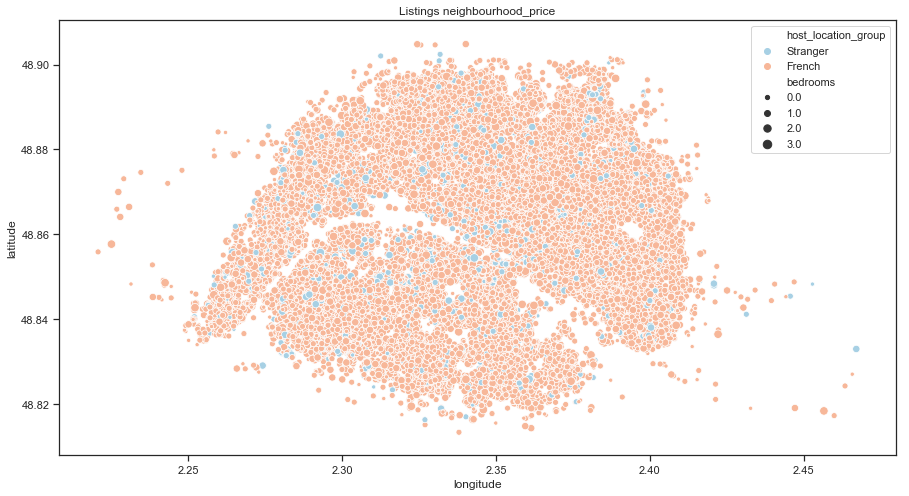

In [315]:
plt.figure(figsize=(15, 8))
plt.title("Listings neighbourhood_price")
sns.scatterplot(x="longitude", y="latitude", hue="host_location_group", size='bedrooms', palette="RdBu_r", data= df_new)
plt.show()  

Parcontre, plus des 1/3 des airbnbs sur Paris donc des résidences secondaires.

In [69]:
def location_outofParis(x):
    if len(str(x).split(","))==3 and str(x).split(",")[0]=="Paris":
        return "Parisian"
    else:
        return "Stranger"

In [70]:
df_new['host_location_parisian'] = df_new['host_location'].apply(lambda x: location_outofParis(x))

df_new['host_location_parisian'].value_counts()

Parisian    35311
Stranger    10791
Name: host_location_parisian, dtype: int64

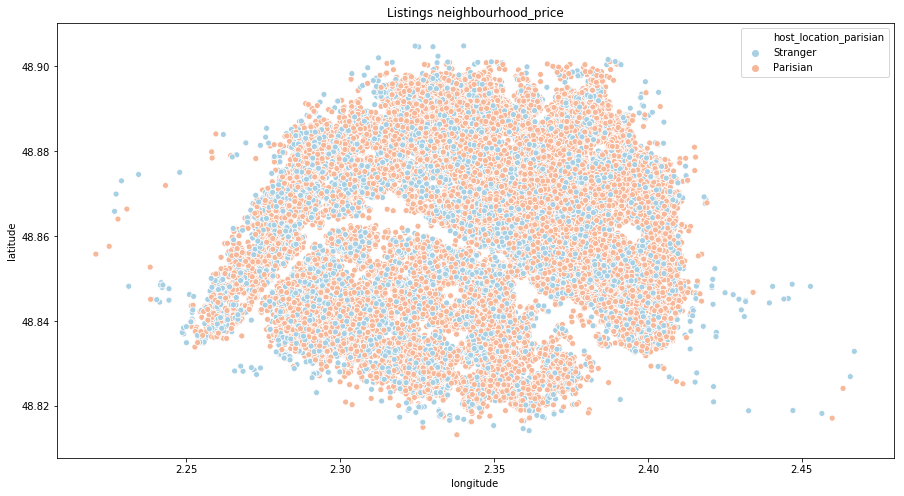

In [71]:
plt.figure(figsize=(15, 8))
plt.title("Listings neighbourhood_price")
sns.scatterplot(x="longitude", y="latitude", hue="host_location_parisian", palette="RdBu_r", data= df_new)
plt.show()  

### 2.4 Faisons quelques stats?

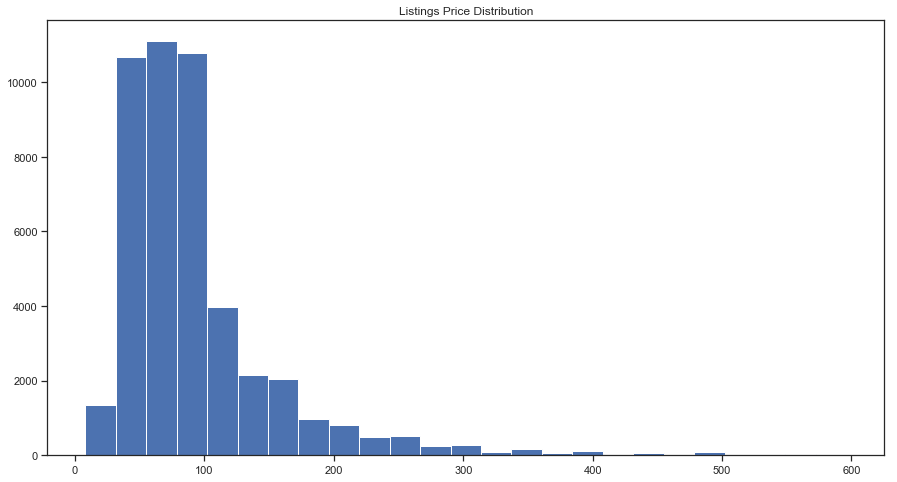

In [213]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
plt.hist(df_new["price"], bins=25)
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


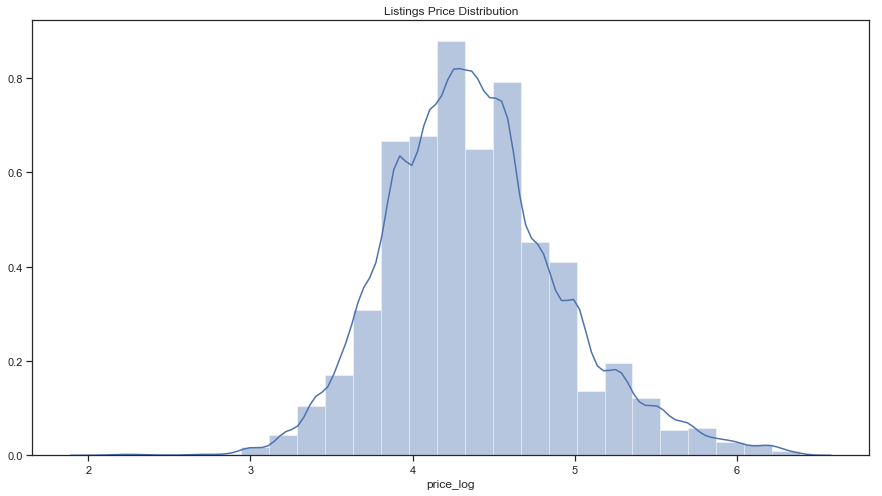

In [232]:
import math
df_new = df_new[df_new['price']>0]
df_new['price_log'] = df_new['price'].apply(lambda x: math.log(x))

plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new["price_log"], bins=25)
plt.show()

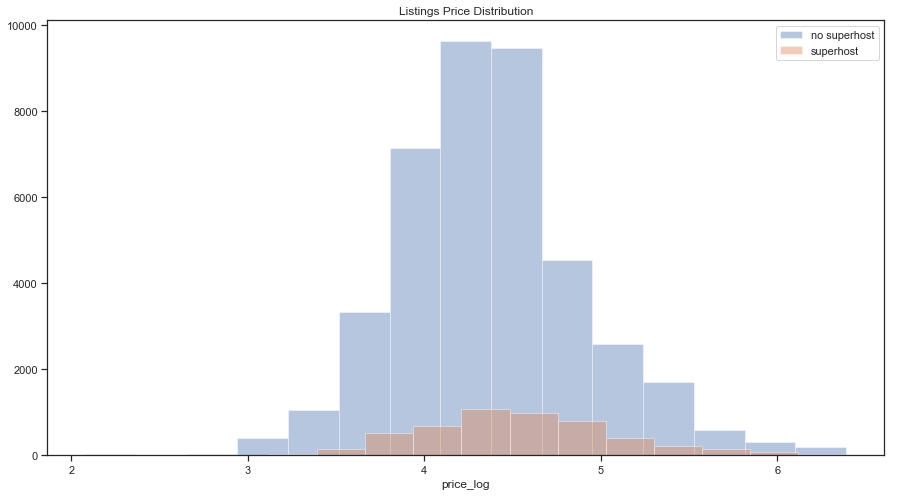

In [240]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['host_is_superhost']=='f']['price_log'], bins=15, kde=False)
sns.distplot(df_new[df_new['host_is_superhost']=='t']['price_log'], bins=15, kde=False)
plt.legend(['no superhost', 'superhost'])
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


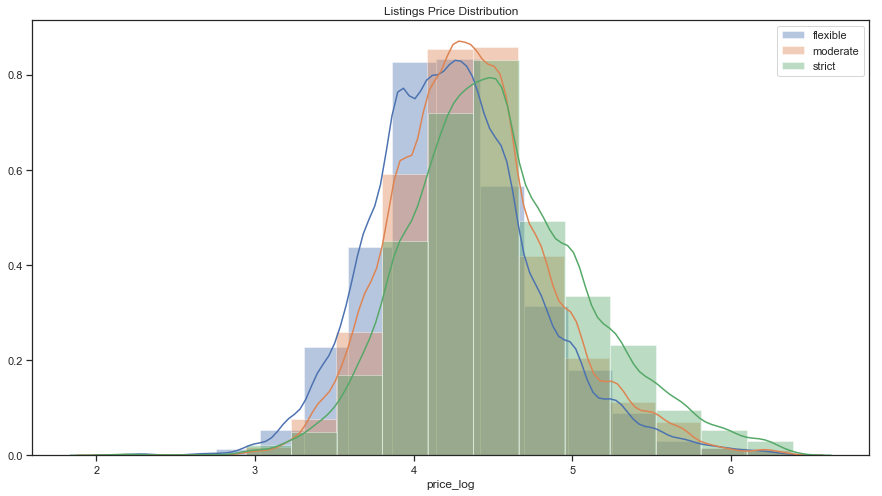

In [238]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['cancellation_policy']=='flexible']['price_log'], bins=15)
sns.distplot(df_new[df_new['cancellation_policy']=='moderate']['price_log'], bins=15)
sns.distplot(df_new[df_new['cancellation_policy']=='strict_14_with_grace_period']['price_log'], bins=15)
plt.legend(['flexible', 'moderate', 'strict'])
plt.show()

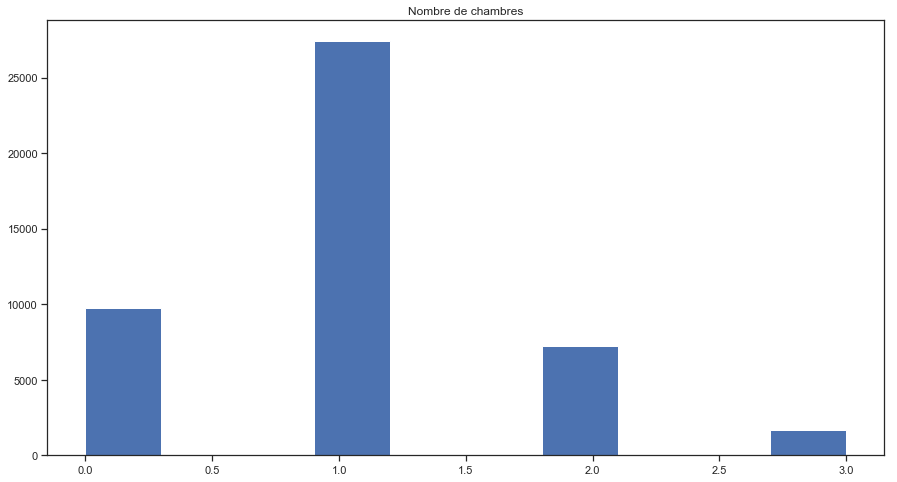

In [218]:
plt.figure(figsize=(15, 8))
plt.title("Nombre de chambres")
plt.hist(df_new['bedrooms'])
plt.show()

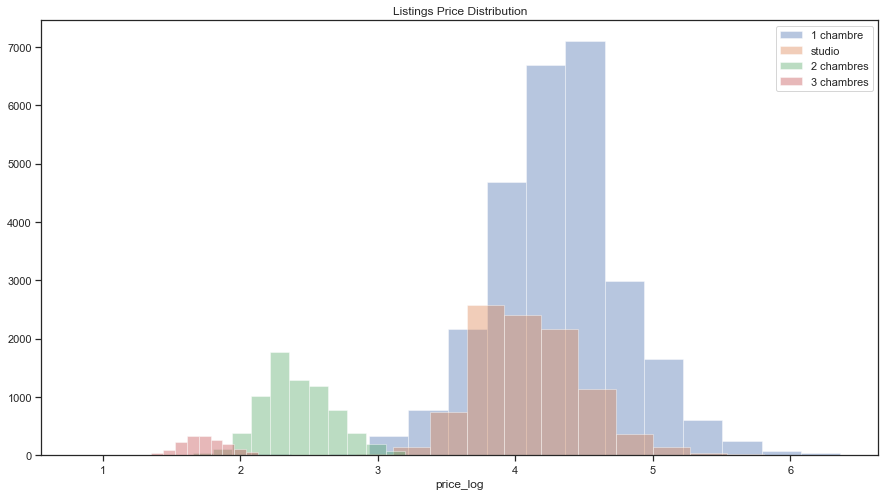

In [243]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['bedrooms']==1]['price_log'], bins=15, kde=False)
sns.distplot(df_new[df_new['bedrooms']==0]['price_log'], bins=15, kde=False)
sns.distplot(df_new[df_new['bedrooms']==2]['price_log']/2, bins=15, kde=False)
sns.distplot(df_new[df_new['bedrooms']==3]['price_log']/3, bins=15, kde=False)
plt.legend(['1 chambre', 'studio', '2 chambres', '3 chambres'])
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


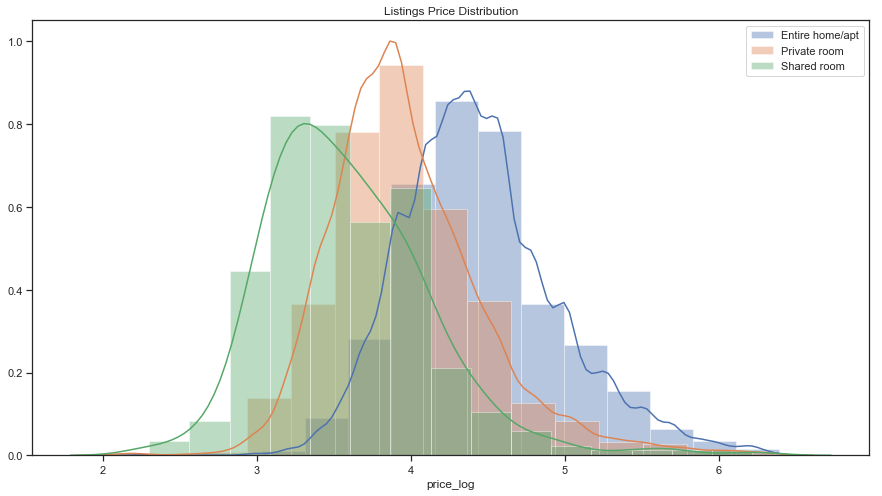

In [245]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['room_type']=='Entire home/apt']['price_log'], bins=15)
sns.distplot(df_new[df_new['room_type']=='Private room']['price_log'], bins=15)
sns.distplot(df_new[df_new['room_type']=='Shared room']['price_log'], bins=15)
plt.legend(['Entire home/apt', 'Private room', 'Shared room'])
plt.show()

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


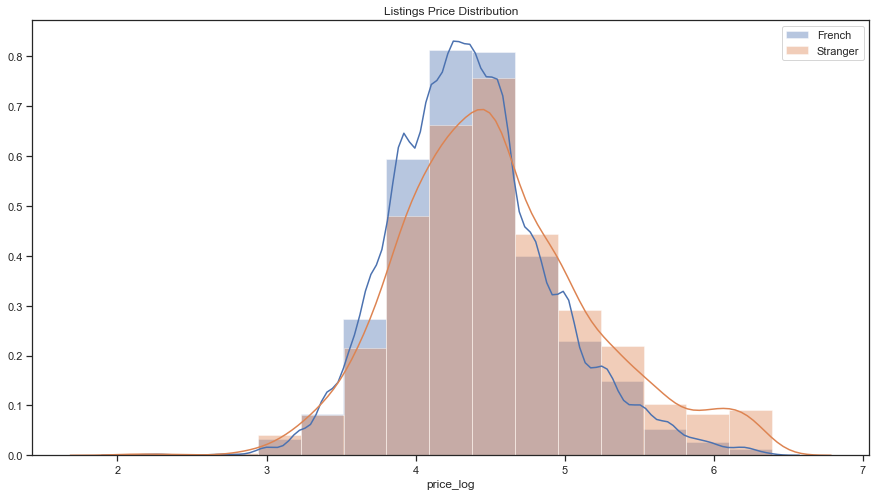

In [246]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['host_location_group']=='French']['price_log'], bins=15)
sns.distplot(df_new[df_new['host_location_group']=='Stranger']['price_log'], bins=15)
plt.legend(['French', 'Stranger'])
plt.show()

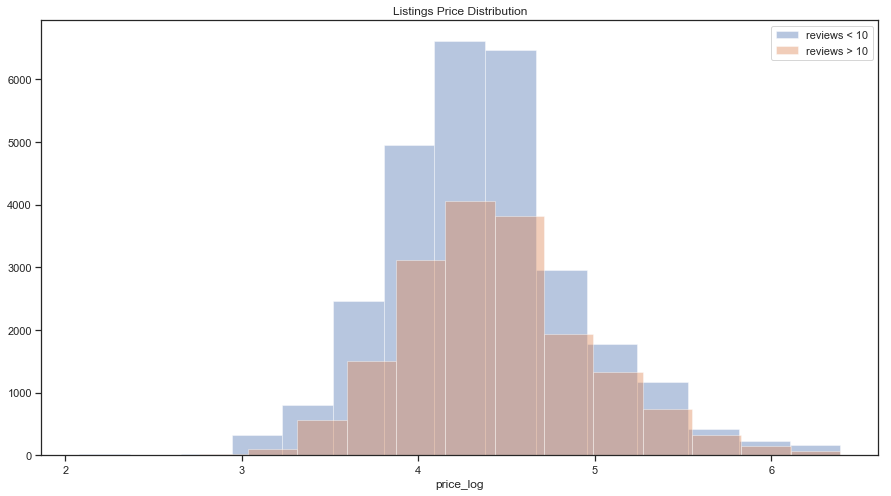

In [252]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(df_new[df_new['number_of_reviews']<=10]['price_log'], bins=15, kde=False)
sns.distplot(df_new[df_new['number_of_reviews']>10]['price_log'], bins=15, kde=False)
plt.legend(['reviews < 10', 'reviews > 10'])
plt.show()

## 3) Prediction de prix 

In [108]:
data = df_new[['latitude', 'longitude', 'host_is_superhost', 'host_identity_verified', 'zipcode', 
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'bed_type', 'price_log', 'guests_included', 'minimum_nights', 'number_of_reviews', 
       'instant_bookable', 'cancellation_policy', 'host_location_group']]

In [100]:
data.head()

latitude  longitude host_is_superhost host_identity_verified  zipcode  \
0  48.869933   2.362511                 f                      t       10   
2  48.851001   2.358690                 f                      t        4   
4  48.874642   2.343411                 f                      t        9   
5  48.865279   2.393263                 f                      f       20   
7  48.862266   2.371341                 t                      f       11   

  property_type        room_type  accommodates  bedrooms  beds       bed_type  \
0          Loft  Entire home/apt             4       2.0   2.0       Real Bed   
2     Apartment  Entire home/apt             2       0.0   1.0  Pull-out Sofa   
4     Apartment  Entire home/apt             2       2.0   2.0       Real Bed   
5     Apartment  Entire home/apt             3       1.0   1.0       Real Bed   
7     Apartment  Entire home/apt             2       1.0   1.0       Real Bed   

   price_log  guests_included  minimum_nights  number_of_reviews  \
0   4.828314                1               3                  0   
2   4.744932                1               2                148   
4   4.595120                2               3                  6   
5   4.499810                1               3                  1   
7   4.248495                1               5                 17   

  instant_bookable          cancellation_policy host_location_group  
0                t  strict_14_with_grace_period            Stranger  
2                t  strict_14_with_grace_period            Stranger  
4                f  strict_14_with_grace_period              French  
5                f                     moderate              French  
7                f  strict_14_with_grace_period              French

Commençons par regarder s'il y a des corrélations notables entre nos données (notamment avec le prix du bien)

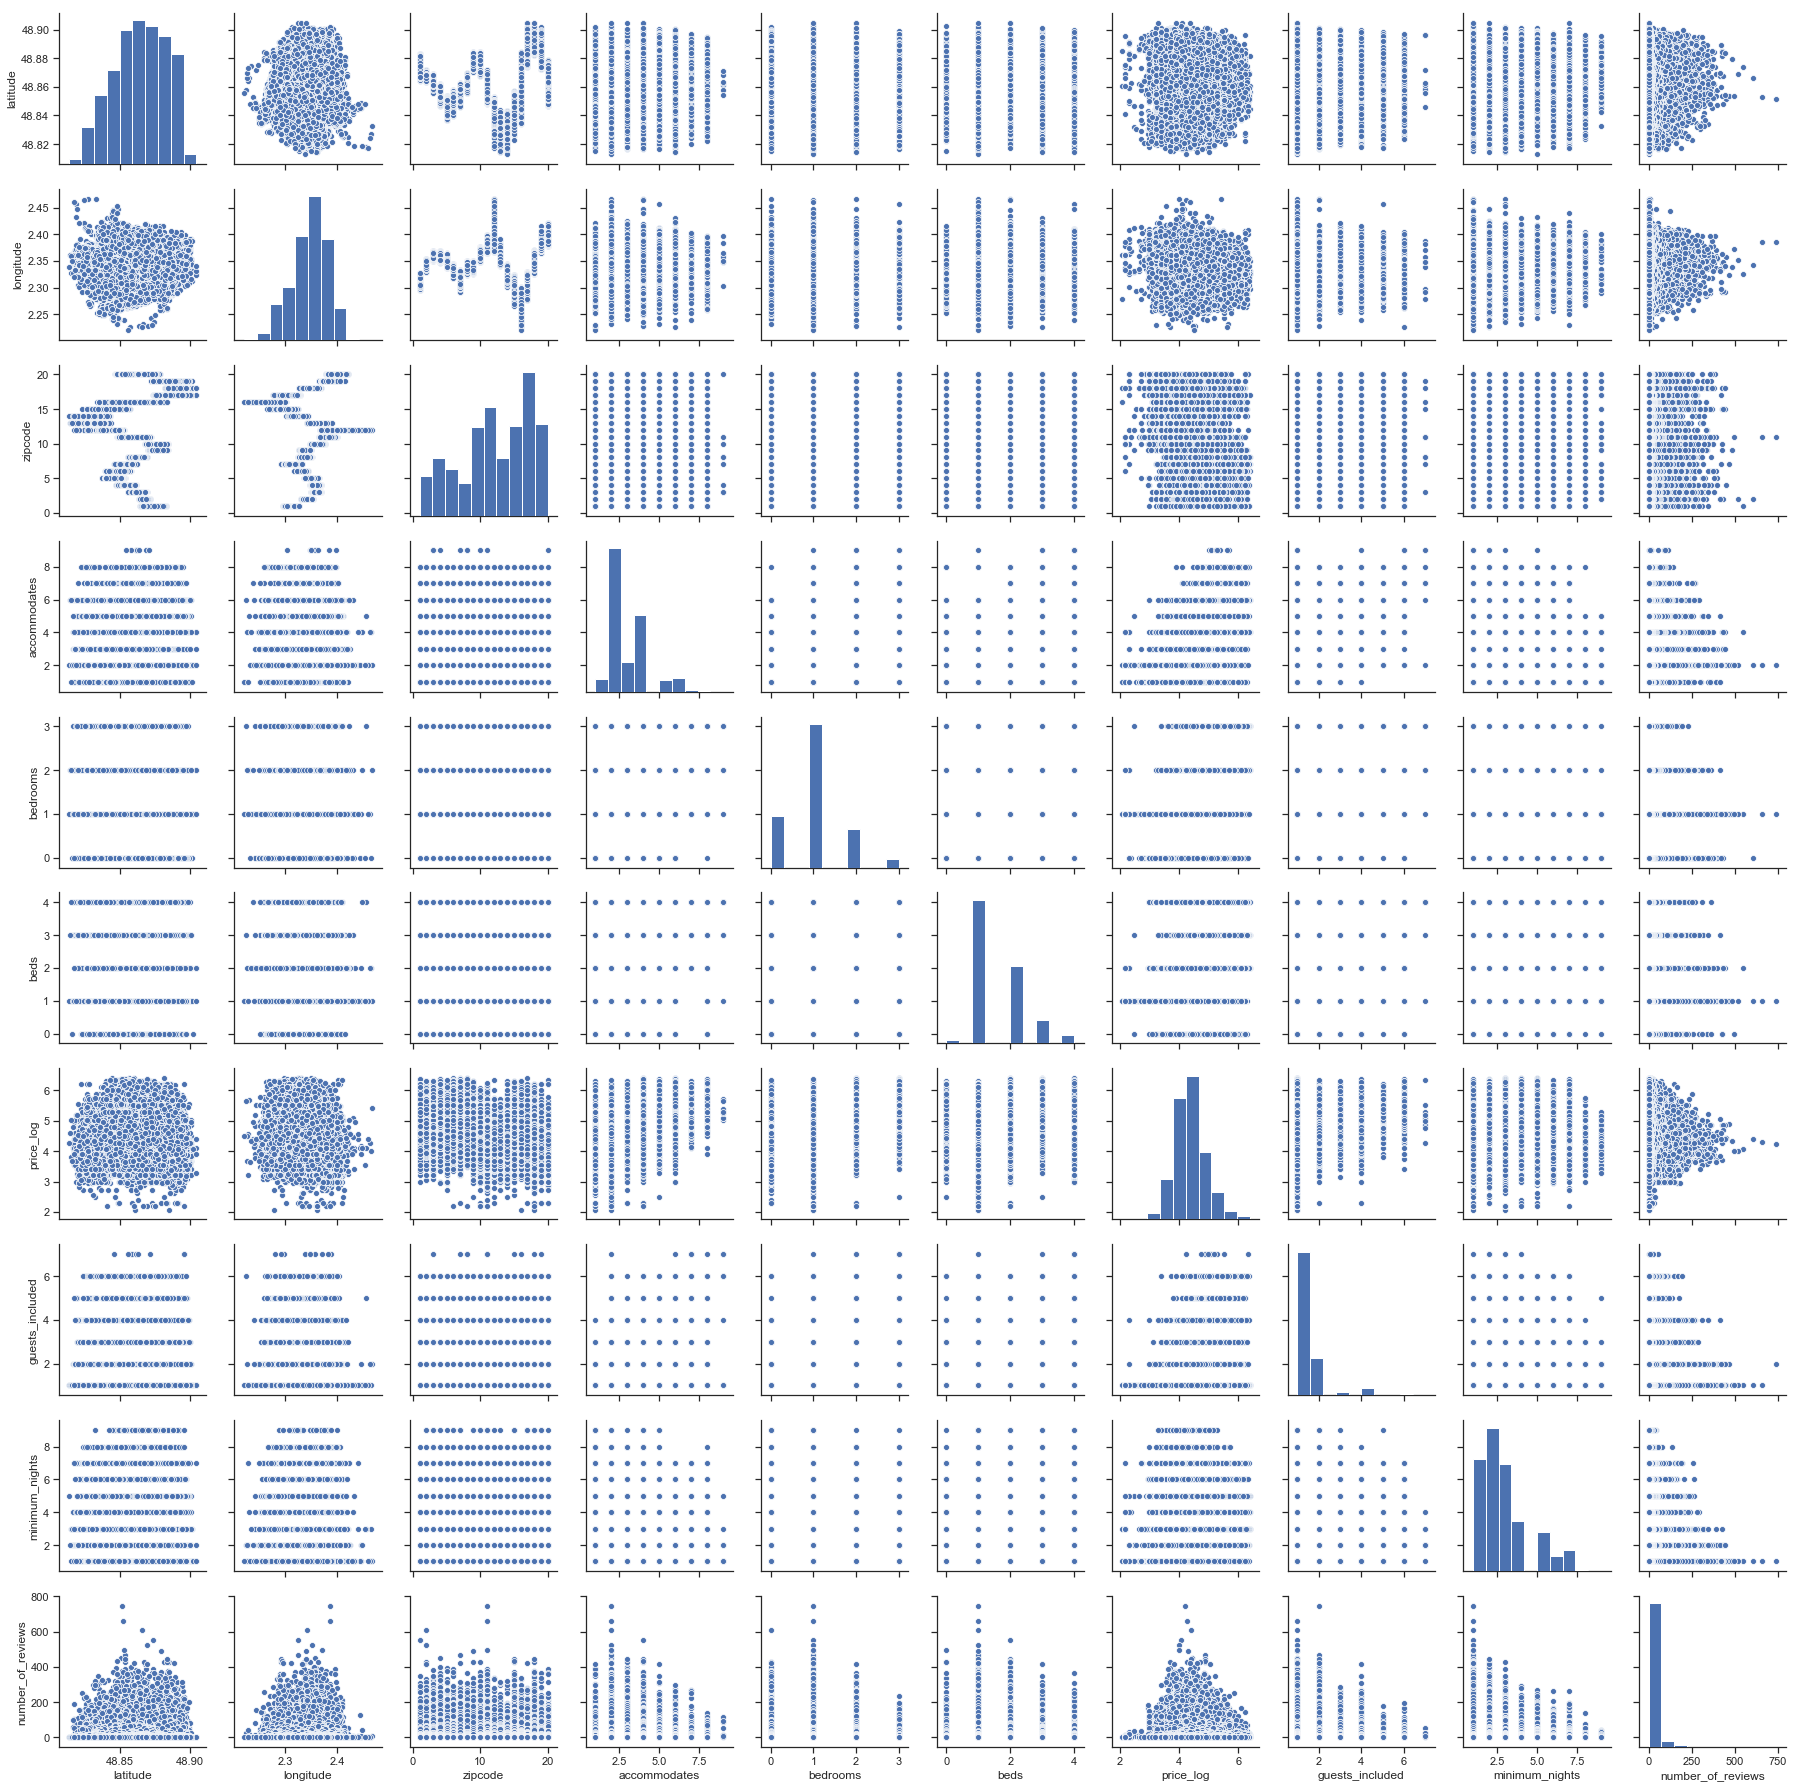

In [101]:
sns.set(style="ticks")
sns.pairplot(data)
plt.show()

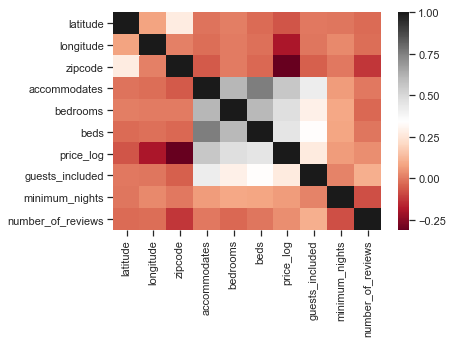

In [102]:
sns.heatmap(data.corr(), cmap= 'RdGy')

Les features ne sont pas forcément corrélés entre elles (et notamment pas forcément avec le prix)

In [103]:
data.property_type.value_counts()

Apartment                 42455
Condominium                1138
Loft                        935
Serviced apartment          351
House                       271
Bed and breakfast           208
Boutique hotel              186
Townhouse                   135
Other                        96
Hotel                        86
Guesthouse                   83
Hostel                       64
Guest suite                  33
Tiny house                   15
Boat                          8
Villa                         8
Aparthotel                    6
Casa particular (Cuba)        3
Houseboat                     3
Earth house                   2
Cave                          2
Treehouse                     1
Tipi                          1
Resort                        1
Cottage                       1
Nature lodge                  1
Igloo                         1
Bungalow                      1
Name: property_type, dtype: int64

In [109]:
def appartement(x):
    if x == 'Apartment':
        return 0
    elif x == 'Condominium':
        return 1
    elif x == 'Loft':
        return 2
    else:
        return 3

data['property_type'] = data['property_type'].apply(lambda x: appartement(x))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [110]:
data.property_type.value_counts()

0    42455
3     1567
1     1138
2      935
Name: property_type, dtype: int64

In [111]:
def cancel(x):
    if x == 'flexible':
        return 0
    elif x == 'moderate':
        return 1
    else:
        return 2

data.cancellation_policy = data.cancellation_policy.apply(lambda x: cancel(x))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [112]:
data.cancellation_policy.value_counts()

0    16822
2    15217
1    14056
Name: cancellation_policy, dtype: int64

In [113]:
def bed(x):
    if x == 'Real Bed':
        return 0
    elif x == 'Pull-out Sofa':
        return 1
    else:
        return 2

data.bed_type = data.bed_type.apply(lambda x: bed(x))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [114]:
data.bed_type.value_counts()

0    43089
1     2284
2      722
Name: bed_type, dtype: int64

In [115]:
data.head(1)

latitude  longitude host_is_superhost host_identity_verified  zipcode  \
0  48.869933   2.362511                 f                      t       10   

   property_type        room_type  accommodates  bedrooms  beds  bed_type  \
0              2  Entire home/apt             4       2.0   2.0         0   

   price_log  guests_included  minimum_nights  number_of_reviews  \
0   4.828314                1               3                  0   

  instant_bookable  cancellation_policy host_location_group  
0                t                    2            Stranger

In [116]:
to_dummify = data[['host_is_superhost', 'host_identity_verified', 'room_type', 
                   'host_location_group', 'instant_bookable']]

dummies = pd.get_dummies(to_dummify)
dummies.columns

Index(['host_is_superhost_f', 'host_is_superhost_t',
       'host_identity_verified_f', 'host_identity_verified_t',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'host_location_group_French',
       'host_location_group_Stranger', 'instant_bookable_f',
       'instant_bookable_t'],
      dtype='object')

In [117]:
dummies = dummies.drop(['host_location_group_Stranger', 'room_type_Shared room', 'host_identity_verified_t', 
                        'host_is_superhost_f', 'instant_bookable_f'], axis=1)
dummies.columns, dummies.shape

(Index(['host_is_superhost_t', 'host_identity_verified_f',
        'room_type_Entire home/apt', 'room_type_Private room',
        'host_location_group_French', 'instant_bookable_t'],
       dtype='object'), (46095, 6))

In [120]:
to_scale = data[['number_of_reviews', 'guests_included', 'zipcode', 'minimum_nights', 'accommodates', 
                 'bedrooms', 'cancellation_policy', 'property_type', 'bed_type']]
to_scale = (to_scale - to_scale.mean(axis=0))/(to_scale.std(axis=0))
to_scale.describe()

number_of_reviews  guests_included       zipcode  minimum_nights  \
count       4.609500e+04     4.609500e+04  4.609500e+04    4.609500e+04   
mean        3.564834e-14     9.408728e-15  5.864656e-16    1.639699e-14   
std         1.000000e+00     1.000000e+00  1.000000e+00    1.000000e+00   
min        -5.121342e-01    -4.756298e-01 -2.056660e+00   -1.101154e+00   
25%        -4.858514e-01    -4.756298e-01 -6.016385e-01   -4.907114e-01   
50%        -3.544374e-01    -4.756298e-01  1.258722e-01   -4.907114e-01   
75%         1.352201e-02     7.463162e-01  8.533830e-01    7.301739e-01   
max         1.904228e+01     6.856047e+00  1.399016e+00    3.782387e+00   

       accommodates      bedrooms  cancellation_policy  property_type  \
count  4.609500e+04  4.609500e+04         4.609500e+04   4.609500e+04   
mean  -1.090333e-15 -4.664789e-14        -1.685516e-15   7.786834e-15   
std    1.000000e+00  1.000000e+00         1.000000e+00   1.000000e+00   
min   -1.495846e+00 -1.420126e+00        -1.158698e+00  -2.699487e-01   
25%   -7.223841e-01 -2.449432e-02        -1.158698e+00  -2.699487e-01   
50%   -7.223841e-01 -2.449432e-02         4.180065e-02  -2.699487e-01   
75%    8.245391e-01 -2.449432e-02         1.242300e+00  -2.699487e-01   
max    4.691847e+00  2.766769e+00         1.242300e+00   4.572424e+00   

           bed_type  
count  4.609500e+04  
mean   4.165457e-14  
std    1.000000e+00  
min   -2.488043e-01  
25%   -2.488043e-01  
50%   -2.488043e-01  
75%   -2.488043e-01  
max    5.903896e+00

**Concatenation**

In [128]:
X = pd.concat([to_scale, dummies, data[['latitude', 'longitude']]],  axis=1)
y = data[['price_log']]
X.head(1)

number_of_reviews  guests_included   zipcode  minimum_nights  accommodates  \
0          -0.512134         -0.47563 -0.419761        0.119731      0.824539   

   bedrooms  cancellation_policy  property_type  bed_type  \
0  1.371137               1.2423         2.9583 -0.248804   

   host_is_superhost_t  host_identity_verified_f  room_type_Entire home/apt  \
0                    0                         0                          1   

   room_type_Private room  host_location_group_French  instant_bookable_t  \
0                       0                           0                   1   

    latitude  longitude  
0  48.869933   2.362511

## 4) Model Training

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train_new = X_train.drop(columns=['latitude', 'longitude'])
X_test_new = X_test.drop(columns=['latitude', 'longitude'])

In [150]:
lr = LinearRegression()
lr.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
from sklearn.metrics import r2_score
print(r2_score(y_train, lr.predict(X_train_new)))
print('------------------------')
print(r2_score(y_test, lr.predict(X_test_new)))

0.49820972344711634
------------------------
0.49381058606046946


Il n'y a donc pas d'overfitting sur notre modèle

In [210]:
feature_important_lr = pd.DataFrame(lr.coef_[0],
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_important_lr

importance
room_type_Entire home/apt     0.703129
room_type_Private room        0.353973
bedrooms                      0.157187
accommodates                  0.150089
host_is_superhost_t           0.126505
property_type                 0.056331
distance_centre               0.046954
cancellation_policy           0.045097
instant_bookable_t            0.035263
host_identity_verified_f      0.019098
guests_included               0.001022
minimum_nights               -0.007203
number_of_reviews            -0.008600
bed_type                     -0.022517
host_location_group_French   -0.105580
zipcode                      -0.166947

In [265]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, lr.predict(X_test_new))

0.14774238699653247

In [312]:
import numpy as np
y_pred = lr.predict(X_test_new)
price_pred = np.array([int(math.exp(i)) for i in y_pred])
price_vrai = np.array([int(math.exp(i)) for i in y_test.values])

ecart_moyen = np.sum(np.abs(price_vrai-price_pred))/len(price_vrai)

print("l'écart moyen trouvé est de: "+str(int(ecart_moyen))+ " dollars")

l'écart moyen trouvé est de: 28 dollars


In [301]:
ratio = pd.concat([pd.DataFrame(price_vrai, columns=['price_vrai']), 
                    pd.DataFrame(price_pred, columns=['price_pred'])],  axis=1)
ratio['difference'] = ratio['price_vrai'].values - ratio['price_pred'].values

ratio.head()

price_vrai  price_pred  difference
0          78          61          17
1         184         187          -3
2         100          95           5
3         159          66          93
4          49          48           1

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


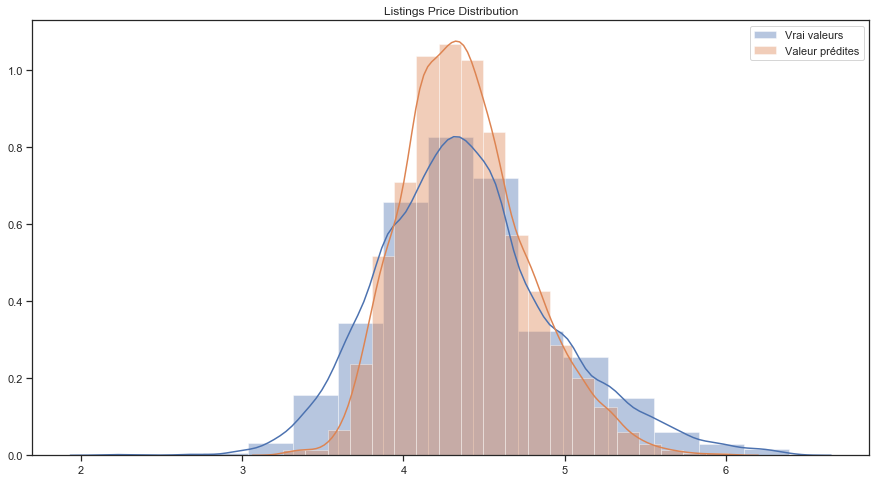

In [157]:
plt.figure(figsize=(15, 8))
plt.title("Listings Price Distribution")
sns.distplot(y_test, bins=15)
sns.distplot(lr.predict(X_test_new), bins=20)
plt.legend(['Vrai valeurs', 'Valeur prédites'])
plt.show()

In [158]:
X_test['price_predict'] = lr.predict(X_test_new)

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


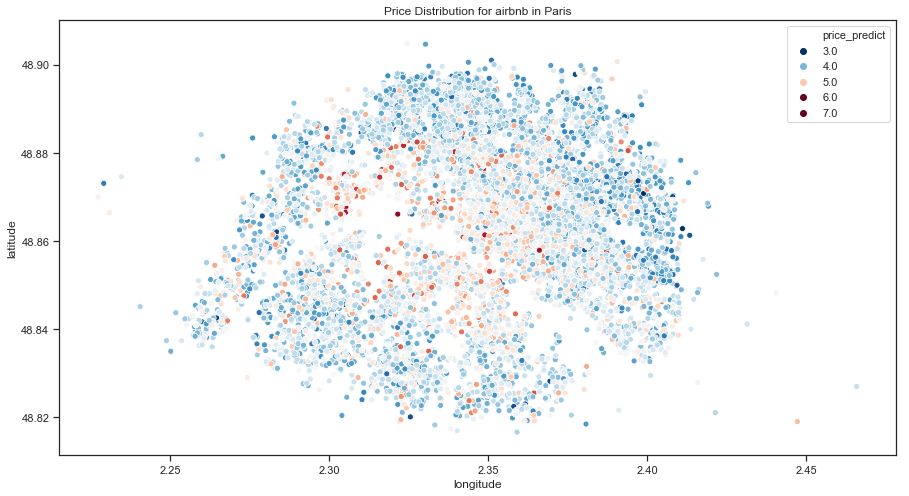

In [159]:
plt.figure(figsize=(15, 8))
plt.title("Price Distribution for airbnb in Paris")
sns.scatterplot(x="longitude", y="latitude", hue='price_predict', palette="RdBu_r", data= X_test)
plt.show()

In [167]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, max_depth= 10)
RFR.fit(X_train_new, y_train)
print(r2_score(y_train, RFR.predict(X_train_new)))
print('------------------------')
print(r2_score(y_test, RFR.predict(X_test_new)))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6126271830144386
------------------------
0.5483226865068036


In [170]:
feature_importances = pd.DataFrame(RFR.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
accommodates                  0.412655
zipcode                       0.219814
bedrooms                      0.162602
room_type_Entire home/apt     0.061250
number_of_reviews             0.028523
property_type                 0.026279
minimum_nights                0.020556
cancellation_policy           0.017895
guests_included               0.009306
host_is_superhost_t           0.009292
room_type_Private room        0.007565
bed_type                      0.007492
host_location_group_French    0.006953
instant_bookable_t            0.005701
host_identity_verified_f      0.004118

In [177]:
optimise = X[['latitude', 'longitude', 'accommodates', 'zipcode', 'bedrooms']]
X_train, X_test, y_train, y_test = train_test_split(optimise, y, random_state=0, test_size=0.2)
X_train_optimise_new = X_train.drop(columns=['latitude', 'longitude'])
X_test_optimise_new = X_test.drop(columns=['latitude', 'longitude'])

In [178]:
lr_optimise = LinearRegression()
lr_optimise.fit(X_train_optimise_new, y_train)

print(r2_score(y_train, lr_optimise.predict(X_train_optimise_new)))
print('------------------------')
print(r2_score(y_test, lr_optimise.predict(X_test_optimise_new)))

0.4291255376837353
------------------------
0.42096596236065875


In [181]:
from sklearn.ensemble import RandomForestRegressor
RFR_optimise = RandomForestRegressor(n_estimators=1000, max_depth= 10)
RFR_optimise.fit(X_train_optimise_new, y_train)
print(r2_score(y_train, RFR_optimise.predict(X_train_optimise_new)))
print('------------------------')
print(r2_score(y_test, RFR_optimise.predict(X_test_optimise_new)))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5025537127401323
------------------------
0.47660419818837707


## 5) Nouvelle feature

In [188]:
X.head(1)
latitude_centre = 48.8534
longitude_centre = 2.3488

def distance(x, y):
    return ((x-latitude_centre)**2 + (y-longitude_centre)**2)**1/2
X['distance_centre'] = distance(X.latitude.values, X.longitude.values)

In [189]:
X.head(1)

number_of_reviews  guests_included   zipcode  minimum_nights  accommodates  \
0          -0.512134         -0.47563 -0.419761        0.119731      0.824539   

   bedrooms  cancellation_policy  property_type  bed_type  \
0  1.371137               1.2423         2.9583 -0.248804   

   host_is_superhost_t  host_identity_verified_f  room_type_Entire home/apt  \
0                    0                         0                          1   

   room_type_Private room  host_location_group_French  instant_bookable_t  \
0                       0                           0                   1   

    latitude  longitude  distance_centre  
0  48.869933   2.362511         0.000231

In [196]:
##scaling
X['distance_centre'] = (X['distance_centre'] - X['distance_centre'].mean())/X['distance_centre'].std()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train_new = X_train.drop(columns=['latitude', 'longitude'])
X_test_new = X_test.drop(columns=['latitude', 'longitude'])

In [197]:
lr = LinearRegression()
lr.fit(X_train_new, y_train)
print(r2_score(y_train, lr.predict(X_train_new)))
print('------------------------')
print(r2_score(y_test, lr.predict(X_test_new)))

0.5035255307480963
------------------------
0.4965222489560459


In [209]:
feature_important_lr = pd.DataFrame(lr.coef_[0],
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_important_lr

importance
room_type_Entire home/apt     0.703129
room_type_Private room        0.353973
bedrooms                      0.157187
accommodates                  0.150089
host_is_superhost_t           0.126505
property_type                 0.056331
distance_centre               0.046954
cancellation_policy           0.045097
instant_bookable_t            0.035263
host_identity_verified_f      0.019098
guests_included               0.001022
minimum_nights               -0.007203
number_of_reviews            -0.008600
bed_type                     -0.022517
host_location_group_French   -0.105580
zipcode                      -0.166947

In [198]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, max_depth= 10)
RFR.fit(X_train_new, y_train)
print(r2_score(y_train, RFR.predict(X_train_new)))
print('------------------------')
print(r2_score(y_test, RFR.predict(X_test_new)))

/Users/mickaelnunes/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.624272878492204
------------------------
0.5524837598961763


In [199]:
feature_importances = pd.DataFrame(RFR.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
accommodates                  0.404591
zipcode                       0.201597
bedrooms                      0.158592
distance_centre               0.061812
room_type_Entire home/apt     0.059042
property_type                 0.023575
number_of_reviews             0.020959
minimum_nights                0.016094
cancellation_policy           0.013742
host_is_superhost_t           0.007462
guests_included               0.007212
room_type_Private room        0.007058
bed_type                      0.006223
host_location_group_French    0.005713
instant_bookable_t            0.003666
host_identity_verified_f      0.002661

In [309]:
y_pred = RFR.predict(X_test_new)
price_pred = np.array([int(math.exp(i)) for i in y_pred])
price_vrai = np.array([int(math.exp(i)) for i in y_test.values])

ecart_moyen = np.sum(np.abs(price_vrai-price_pred))/len(price_vrai)

ecart_moyen

26.733593665256535

## 6) Conclusion 

Grâce à cette étude de cas, nous avons pu voir plusieurs choses:
- Comment importer un jeux de données au format CSV et l'analyser
- Le nettoyer et remplir les valeurs manquantes
- Ajouter des données si nécessaire
- Faire une étude statistique en regardant les corrélations entre les données
- Réaliser un exercice rapide de prédiction et l'optimiser

Afin de l'améliorer, et en lien avec les datas scientist, je propose les optimisations suivantes:
- Créer dans un premier temps de nouveaux scoring:
    - Travail de NLP pour essayer d'évaluer si l'appartement est luxueux, refait à neuf etc...
    - La vue est-elle dégagé et l'appartement calme?
    - Est-il fonctionnel?
    
- Prendre le temps de remplir les éléments manquants:
    - Les commentaires sur chaque bien sont très importants
    - Avons-nous plus de détails sur la taille de l'appartement?
    - Est-il loin des transports?
    - Est-il loin de ses besoins (travail, aeroport, exposition...)
    
- Enfin, il me semblerait important d'ajouter de la saisonnalité ou à minima un scoring définissant:
    - Basse saison
    - Haute saison
    - Connaître le taux de remplissage de l'appartement
